In [73]:
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten,Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
import tensorflow.keras
import matplotlib.pyplot as plt

In [42]:
train=ImageDataGenerator(rescale=1/255)
valid=ImageDataGenerator(rescale=1/255)

In [51]:
train_dataset=train.flow_from_directory('Basedata/Training/',
                                        target_size=(227,227),
                                        batch_size=2,
                                        class_mode='categorical')
validation_dataset=valid.flow_from_directory('Basedata/Validation/',
                                        target_size=(227,227),
                                        batch_size=2,
                                        class_mode='categorical')

Found 834 images belonging to 4 classes.
Found 24 images belonging to 4 classes.


In [61]:
# (3) Create a sequential model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(227,227,3), kernel_size=(11,11),strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
#Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(4))
model.add(Activation('softmax'))

In [86]:
model.compile(loss='categorical_crossentropy',
             optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.0001),
             metrics='accuracy')

In [ ]:
model_fit=model.fit(train_dataset,
                    steps_per_epoch=4,
                    epochs=20,
                   validation_data=validation_dataset)

Epoch 1/20
4/4 [==============================] - 3s 758ms/step - loss: 3.3576 - accuracy: 0.3750 - val_loss: 54.2868 - val_accuracy: 0.2083
Epoch 2/20
4/4 [==============================] - 3s 806ms/step - loss: 4.7810 - accuracy: 0.3750 - val_loss: 50.1922 - val_accuracy: 0.2500
Epoch 3/20
4/4 [==============================] - 3s 736ms/step - loss: 3.5081 - accuracy: 0.2500 - val_loss: 47.9117 - val_accuracy: 0.2083
Epoch 4/20
4/4 [==============================] - 3s 746ms/step - loss: 3.8506 - accuracy: 0.1250 - val_loss: 46.5880 - val_accuracy: 0.2500
Epoch 5/20
4/4 [==============================] - 3s 744ms/step - loss: 3.1900 - accuracy: 0.6250 - val_loss: 43.5611 - val_accuracy: 0.2500
Epoch 6/20
4/4 [==============================] - 3s 737ms/step - loss: 8.8445 - accuracy: 0.0000e+00 - val_loss: 41.7369 - val_accuracy: 0.2500
Epoch 7/20
4/4 [==============================] - 3s 759ms/step - loss: 4.8306 - accuracy: 0.2500 - val_loss: 38.2672 - val_accuracy: 0.2500
Epoch 8/2

In [88]:
print(model_fit.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


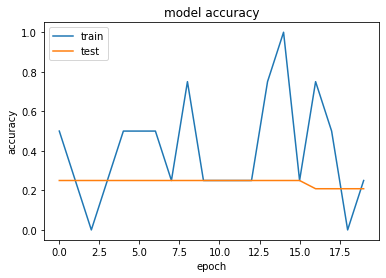

In [89]:
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

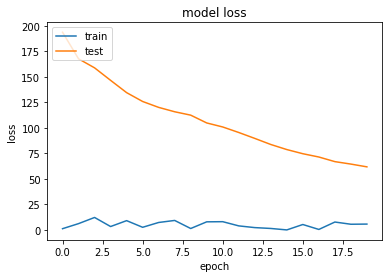

In [90]:
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()